 ## Land Cover Classification and Forest Loss Documentation in Assam, India
 
 #### MUSA650 Final Project submitted by Roshini Ganesh and Samriddhi Khare
 
 This project undertakes a critical endeavor by leveraging deep learning techniques to analyze satellite imagery and address the pressing issue of deforestation in Assam, India. Initially, it assesses the effectiveness of two deep learning models using the EUROSAT RGB dataset, aiming to identify the model with the highest classification accuracy. This step is crucial as it lays the foundation for accurate image classification, which is pivotal for subsequent analyses.

Subsequently, the project imports unclassified satellite images from 2015 and 2023, covering the Assam region at 10m resolution of 4096x4096 pixel size. These images are then divided into smaller patches measuring 64x64 pixels each, resulting in 4096 patches per image tile. Through the application of the trained deep learning models, the project predicts the probability of each image patch representing a forested area.

The significance of this study lies in its ability to quantify and analyze changes in forest cover over an 8-year period. By comparing the count of forest patches between 2015 and 2023, the project sheds light on the extent of deforestation within the study area. This information is invaluable for policymakers, conservationists, and local communities, as it provides actionable insights into the rate and spatial distribution of deforestation.

Furthermore, the project's focus on Assam, India, holds particular importance due to the region's rich biodiversity and ecological significance. Deforestation in Assam not only poses a threat to local flora and fauna but also impacts global climate patterns and exacerbates environmental degradation. Understanding and quantifying deforestation rates in Assam through advanced image analysis techniques are essential steps towards devising effective conservation strategies and promoting sustainable land management practices. With these factors in mind, a study area that is sandwiched between two national parks is selected. 

In summary, this study not only demonstrates the potential of deep learning in environmental research but also contributes  insights into the dynamics of deforestation in Assam, facilitating informed decision-making and fostering conservation efforts to safeguard the region's natural heritage for future generations.

In [59]:
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [61]:
BATCH_SIZE = 32
IMG_HEIGHT = 64
IMG_WIDTH = 64
EPOCHS = 25
DATA_DIR_PATH = "TIFData/EuroSAT_RGB"

num_parameters_time = {}
num_parameters_accuracy = {}
num_parameters = {}

In [62]:
TRAIN_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR_PATH,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

VALIDATION_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR_PATH,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

CLASS_NAMES = TRAIN_DATASET.class_names

Found 27000 files belonging to 10 classes.
Using 24300 files for training.
Found 27000 files belonging to 10 classes.
Using 2700 files for validation.


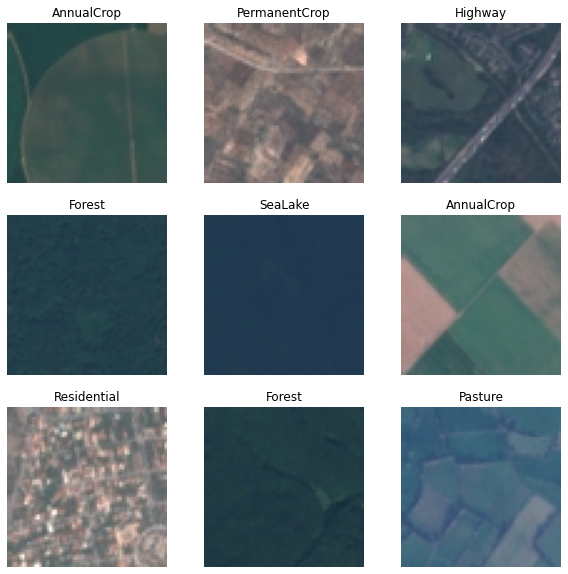

In [63]:
plt.figure(figsize=(10, 10))
for images, labels in TRAIN_DATASET.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASS_NAMES[labels[i]])
    plt.axis("off")
    

In [64]:
TRAIN_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR_PATH,
  validation_split=0.1,
  subset="training",
  color_mode="grayscale",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

VALIDATION_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR_PATH,
  validation_split=0.1,
  subset="validation",
  color_mode="grayscale",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 27000 files belonging to 10 classes.
Using 24300 files for training.
Found 27000 files belonging to 10 classes.
Using 2700 files for validation.


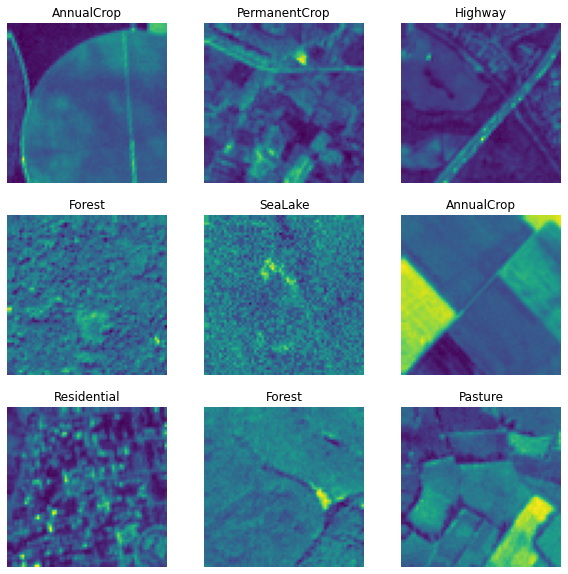

In [65]:
plt.figure(figsize=(10, 10))
for images, labels in TRAIN_DATASET.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(CLASS_NAMES[labels[i]])
    plt.axis("off")

In [66]:
# Build model
model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(CLASS_NAMES))
])

# Compile model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Visualize model architecture
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)              │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 549,002 (2.09 MB)

 Trainable params: 549,002 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

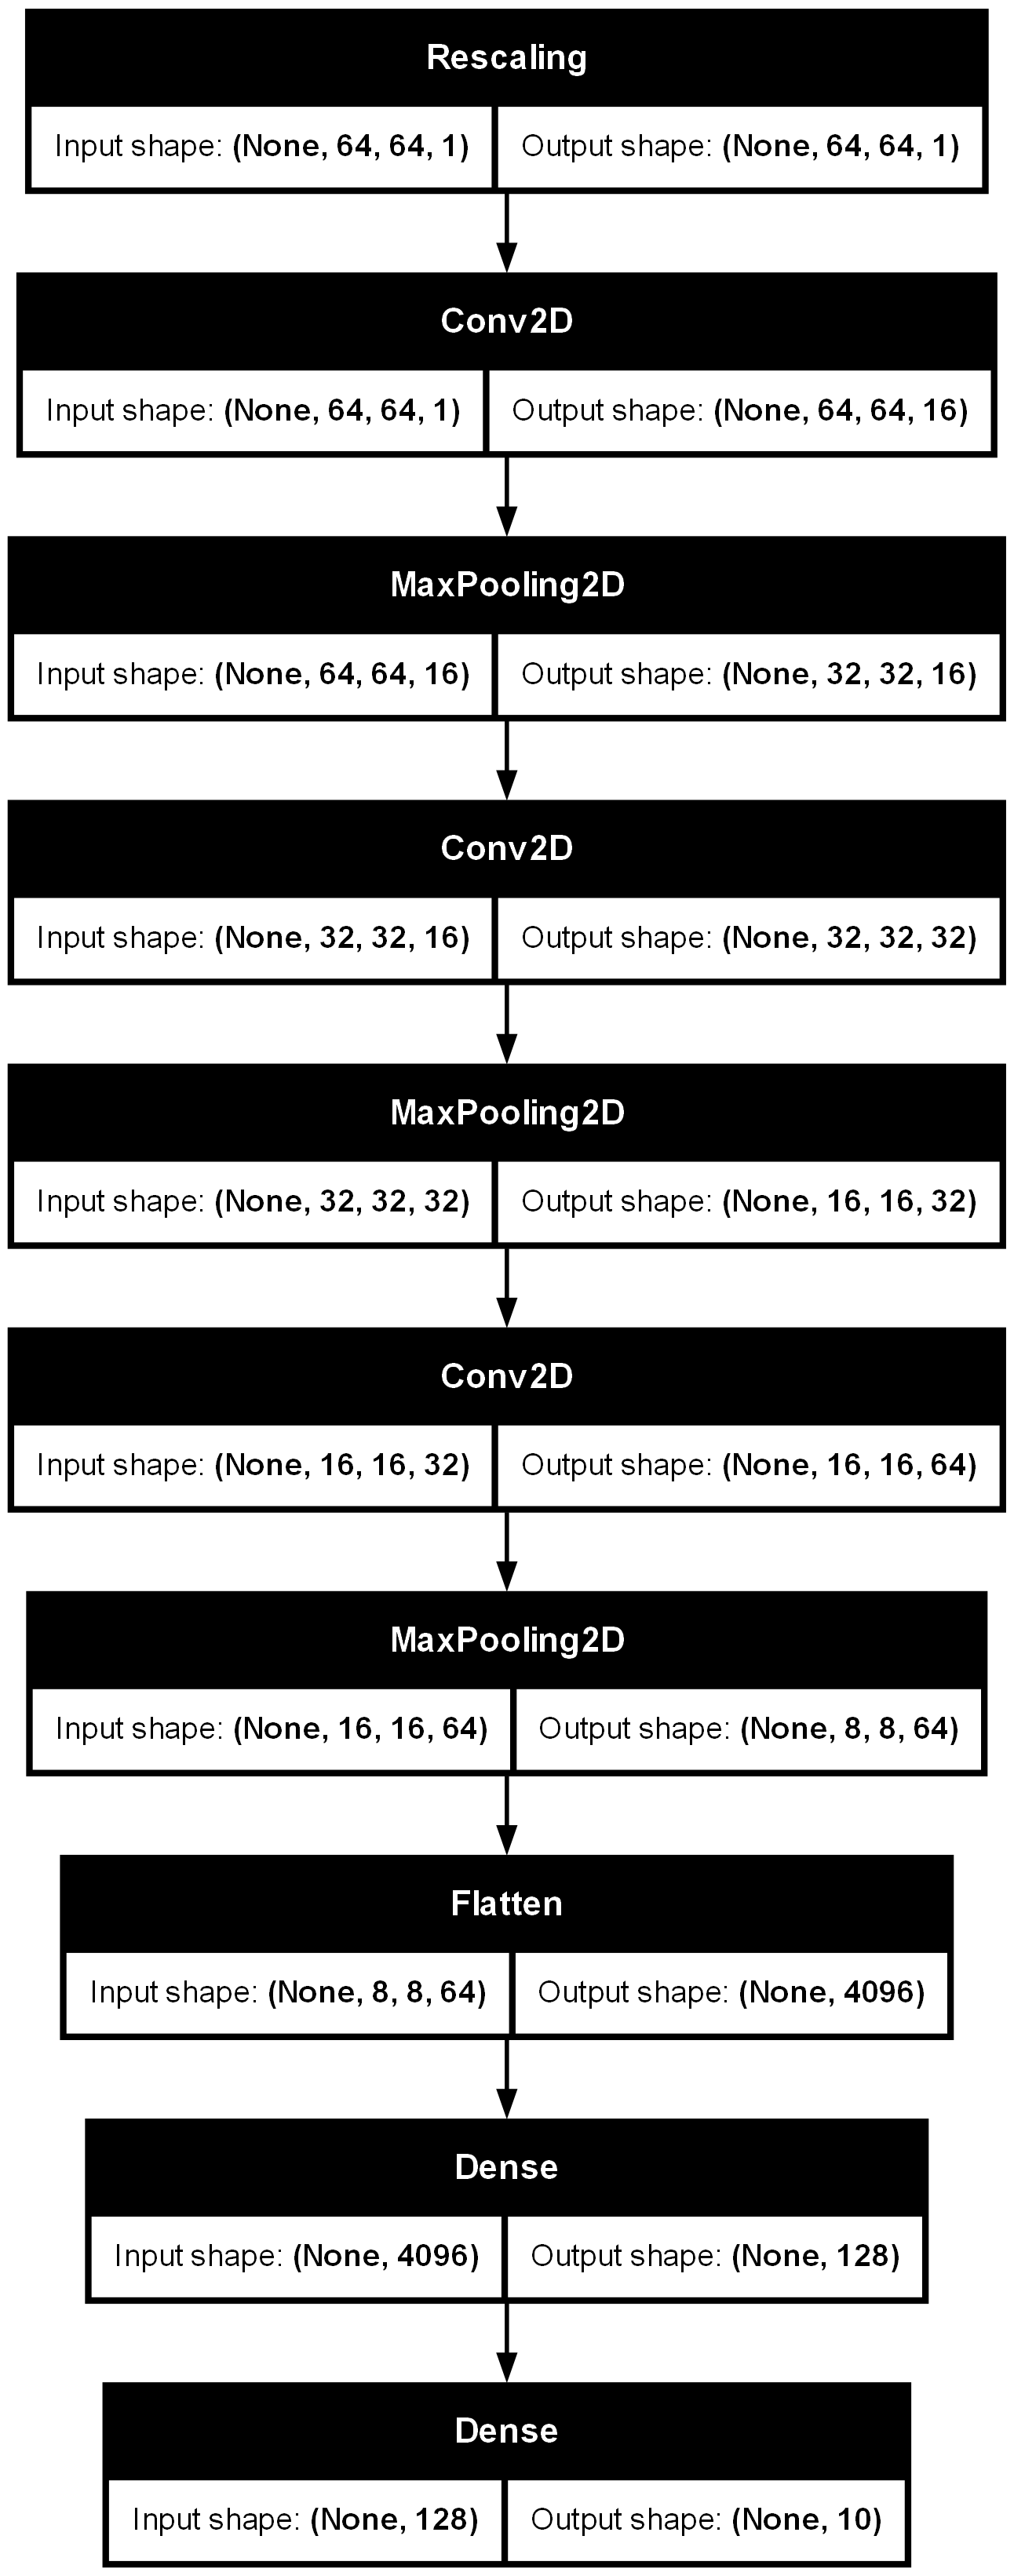

In [67]:
# Plot network architecture
plot_model(model1, to_file='model1_architecture.png', show_shapes=True)

In [68]:
# Train model
start = time()

history = model2.fit(
  TRAIN_DATASET,
  validation_data=VALIDATION_DATASET,
  epochs=15
)

end = time()

elapsed_time = end - start

# Store model details
num_parameters["Grayscale"] = 547970
num_parameters_time["Grayscale"] = elapsed_time
num_parameters_accuracy["Grayscale"] = history.history["val_accuracy"][-1]

# Print model details
print(f"Elapsed Time:{elapsed_time}s")
print(f"Number of Parameters:547970")
print(f"Classification Accuracy: {num_parameters_accuracy['Grayscale']}")

Epoch 1/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9798 - loss: 0.0566 - val_accuracy: 0.8063 - val_loss: 1.1939
Epoch 2/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9813 - loss: 0.0551 - val_accuracy: 0.7867 - val_loss: 1.1550
Epoch 3/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9795 - loss: 0.0618 - val_accuracy: 0.8093 - val_loss: 1.1631
Epoch 4/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9812 - loss: 0.0534 - val_accuracy: 0.8130 - val_loss: 1.0856
Epoch 5/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9846 - loss: 0.0449 - val_accuracy: 0.8059 - val_loss: 1.2205
Epoch 6/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9869 - loss: 0.0416 - val_accuracy: 0.8152 - val_loss: 1.2081
Epoch 7/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9795 - loss: 0.0600 - val_accuracy: 0.8041 - val_loss: 1.3923
Epoch 8/15
760/760 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9848 - loss: 0.0451 - 

In [75]:
# Save the trained model
model1.save('Models/model1.h5')

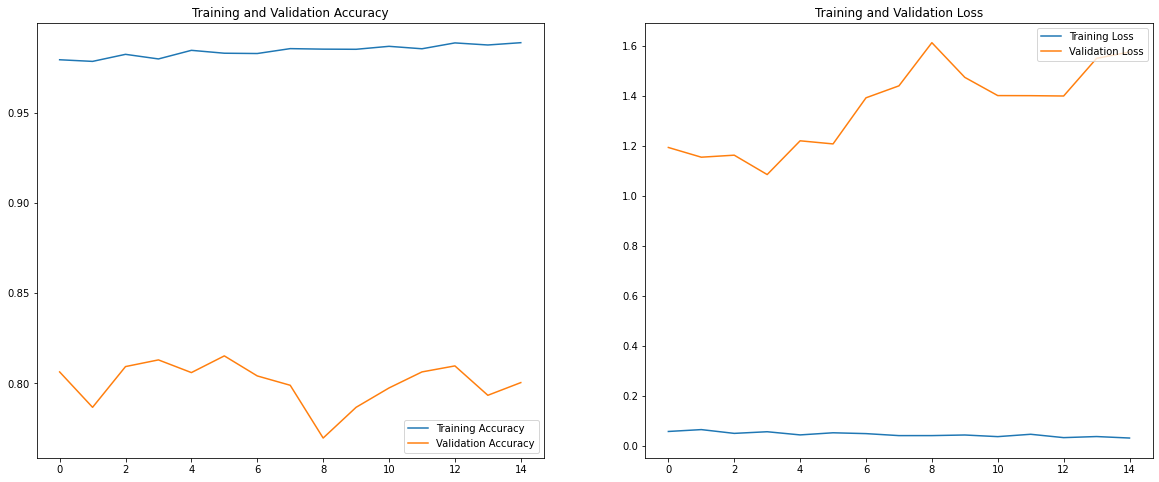

In [76]:
# Print model plot
plot_history(history)

In [77]:
TRAIN_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR_PATH,
  validation_split=0.1,
  subset="training",
  color_mode="rgb",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

VALIDATION_DATASET = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR_PATH,
  validation_split=0.1,
  subset="validation",
  color_mode="rgb",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 27000 files belonging to 10 classes.
Using 24300 files for training.
Found 27000 files belonging to 10 classes.
Using 2700 files for validation.


In [78]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model without the top layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the weights of the VGG16 layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add new fully connected layers on top of the VGG16 base
model2 = Sequential([
    layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Add Rescaling layer directly
    vgg_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(CLASS_NAMES), activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,978,250 (57.14 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

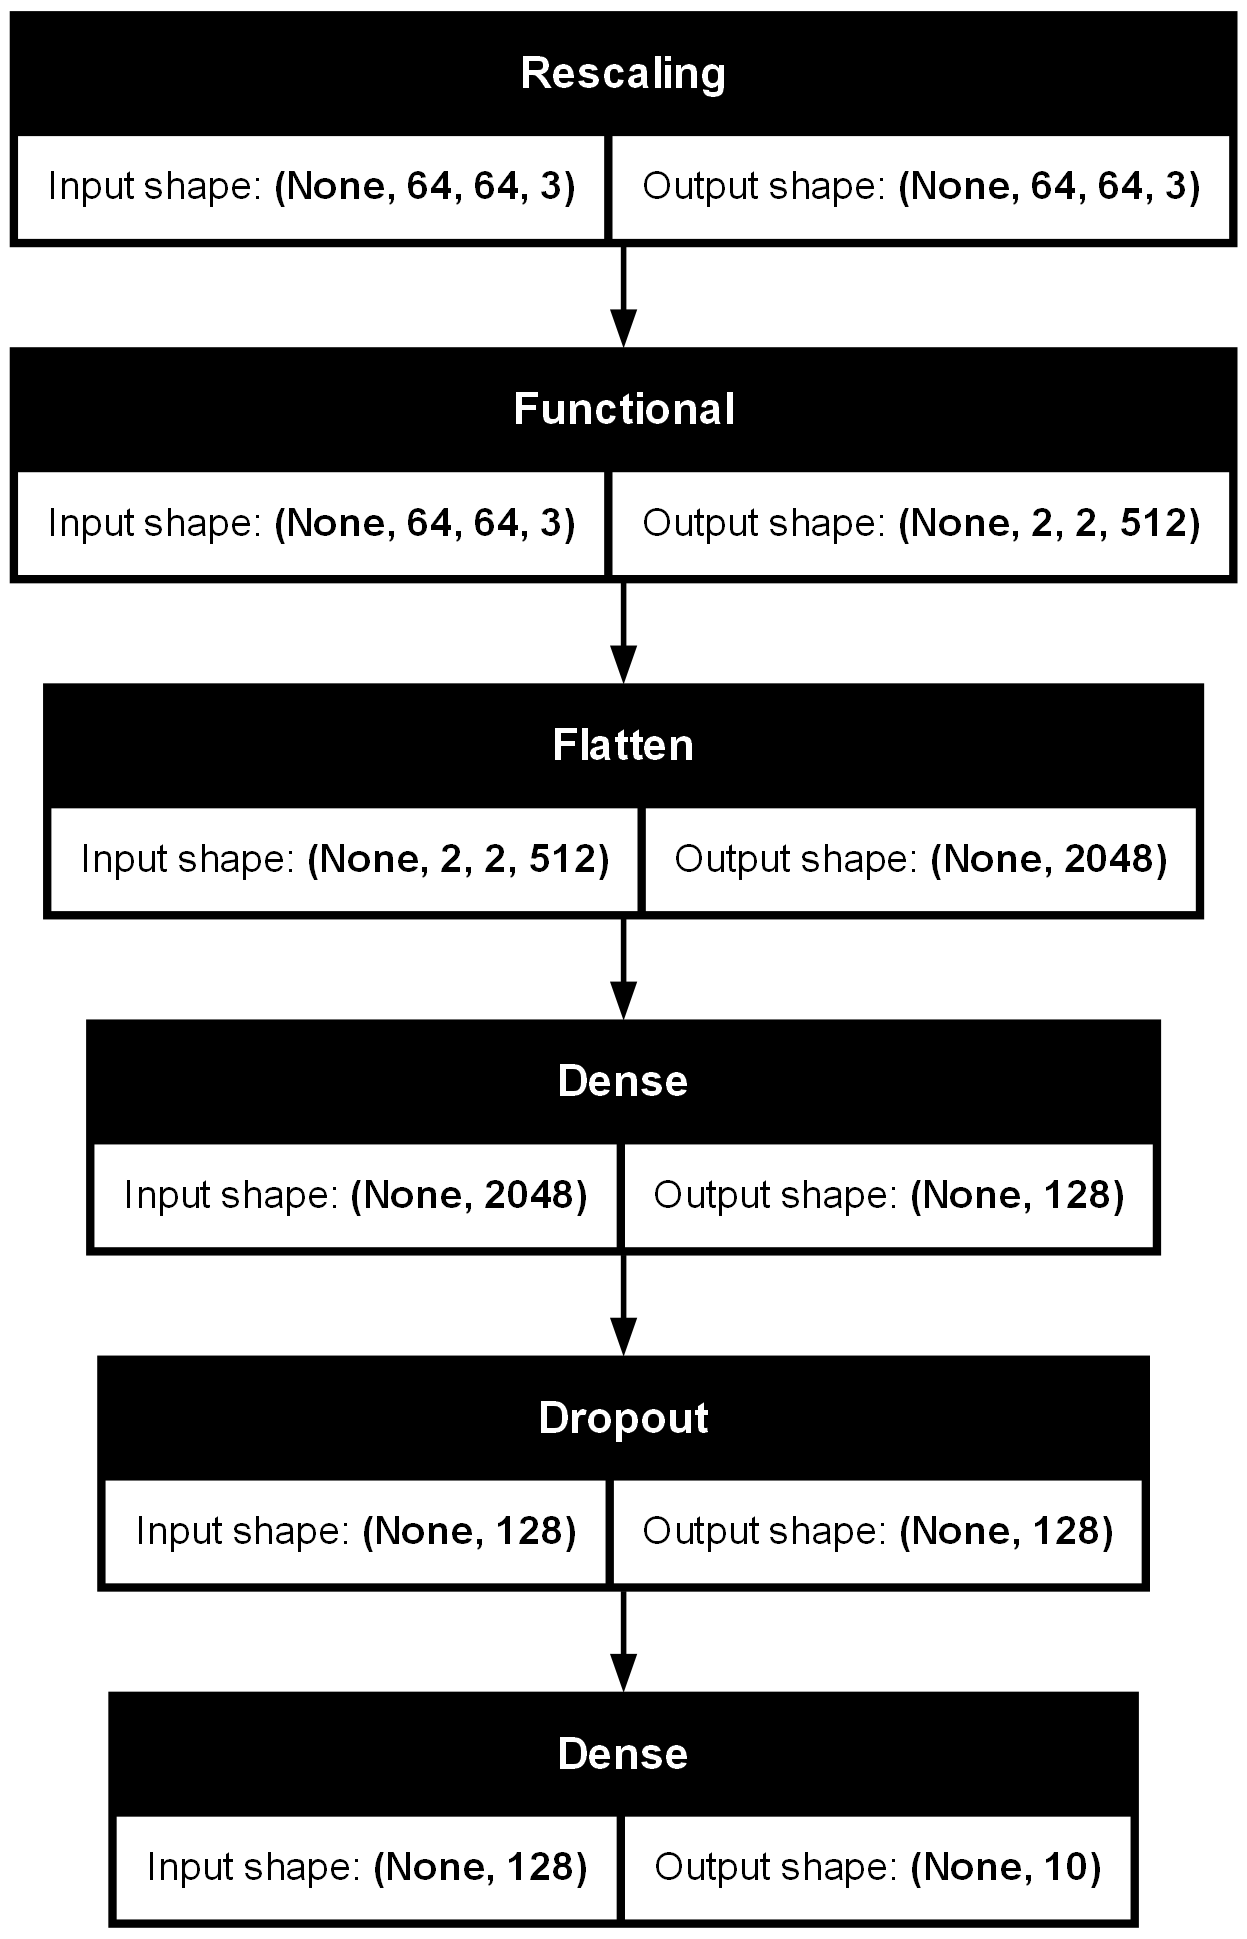

In [79]:
# Plot network architecture
plot_model(model2, to_file='model2_architecture.png', show_shapes=True)

In [80]:
# Train the model
start = time()
history = model2 .fit(
    TRAIN_DATASET,
    validation_data=VALIDATION_DATASET,
    epochs=10
)
end = time()
elapsed_time = end - start
print(f"Elapsed Time: {elapsed_time}s")

# Store model details
num_parameters["VGG16"] = 547970
num_parameters_time["VGG16"] = elapsed_time
num_parameters_accuracy["VGG16"] = history.history["val_accuracy"][-1]

# Print model details
print(f"Elapsed Time:{elapsed_time}s")
print(f"Number of Parameters: 14978250")
print(f"Classification Accuracy: {num_parameters_accuracy['VGG16']}")

Epoch 1/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 282s 370ms/step - accuracy: 0.6146 - loss: 1.1098 - val_accuracy: 0.8159 - val_loss: 0.5258
Epoch 2/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 307s 404ms/step - accuracy: 0.7848 - loss: 0.6235 - val_accuracy: 0.8430 - val_loss: 0.4547
Epoch 3/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 317s 417ms/step - accuracy: 0.8127 - loss: 0.5405 - val_accuracy: 0.8481 - val_loss: 0.4160
Epoch 4/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 308s 405ms/step - accuracy: 0.8289 - loss: 0.5087 - val_accuracy: 0.8593 - val_loss: 0.3977
Epoch 5/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 304s 400ms/step - accuracy: 0.8411 - loss: 0.4697 - val_accuracy: 0.8667 - val_loss: 0.3897
Epoch 6/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 297s 391ms/step - accuracy: 0.8426 - loss: 0.4574 - val_accuracy: 0.8667 - val_loss: 0.3666
Epoch 7/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 296s 389ms/step - accuracy: 0.8469 - loss: 0.4374 - val_accuracy: 0.8719 - val_loss: 0.3757
Epoch 8/10
760/760 ━━━━━━━━━━━━━━━━━━━━ 316s 416ms/step - accuracy: 0.8559 -

In [81]:
# Save the trained model
model2.save('Models/model2.h5')

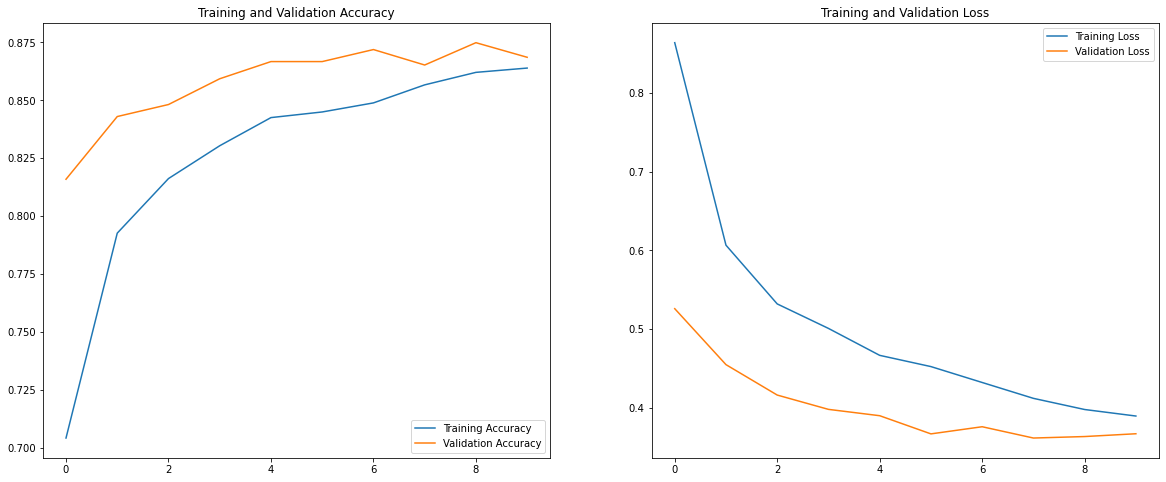

In [82]:
# Print model plot
plot_history(history)

In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import view_as_windows
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the saved trained model
model = load_model('Models/model2.h5')
print("2023 Images:")
    
def count_forest_patches(image, extract_size=64, patch_size=64, forest_threshold=0.5):
    image = image[:, :, :3]
    print("Image shape:", image.shape)

    # Generate patches
    patches = []
    patch_indices = []
    for i in range(0, image.shape[0], extract_size):
        for j in range(0, image.shape[1], extract_size):
            patch = image[i:i+extract_size, j:j+extract_size, :]
            patches.append(patch)
            patch_indices.append((i, j))  # Store the patch indices for visualization
            
    patches = np.array(patches)

    print("Patches shape:", patches.shape)

    # Perform predictions on patches
    patch_predictions = model.predict(patches)

    # Compute forest count
    forest_indices = [CLASS_NAMES.index(class_name) for class_name in ["Forest", "HerbaceousVegetation"]]
    forest_counts = np.sum(np.isin(np.argmax(patch_predictions, axis=1), forest_indices))

    return forest_counts, patch_indices

# Define the folder containing the TIFF files
folder_path = 'TIFData/December 2023'

# Create Array to store forest count values
forest_patch_counts = []

# Iterate over TIFF files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        # Load TIFF file
        tif_path = os.path.join(folder_path, filename)
        with rasterio.open(tif_path) as src:
            image = src.read()  # Read image data
            image = np.moveaxis(image, 0, -1)  # Move channel axis to last dimension
            image = image.astype(np.float32)  # Convert to float32

        # Count forest patches and get patch indices
        forest_count, patch_indices = count_forest_patches(image)
        
        # Append the count to the list
        forest_patch_counts.append(forest_count)

        # Visualize the image with forest patches highlighted
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        for (i, j), prediction in zip(patch_indices, patch_predictions):
            if np.argmax(prediction) in forest_indices:
                plt.plot([j, j+64, j+64, j, j], [i, i, i+64, i+64, i], color='red')  # Highlight forest patches in red
        plt.title(f"TIFF File: {filename}, Number of Forest Patches: {forest_count}")
        plt.show()

# Print the array
print("Forest Patch Counts Array:", forest_patch_counts)


In [143]:
import os
import rasterio
import numpy as np
from skimage.util import view_as_windows
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the saved trained model
model = load_model('Models/model2.h5')
print("2015 Images:")
    
def count_forest_patches(image, extract_size=64, patch_size=64, forest_threshold=0.5):
    image = image[:, :, :3]
    print("Image shape:", image.shape)

    # Generate patches
    patches = []
    for i in range(0, image.shape[0], extract_size):
        for j in range(0, image.shape[1], extract_size):
            extract = image[i:i+extract_size, j:j+extract_size, :]
            patch = tf.image.resize(extract, [patch_size, patch_size])
            patches.append(patch)
            
    patches = np.array(patches)

    print("Patches shape:", patches.shape)

    # Perform predictions on patches
    patch_predictions = model.predict(patches)

    # Compute forest count
    forest_indices = [CLASS_NAMES.index(class_name) for class_name in ["Forest", "HerbaceousVegetation"]]
    forest_counts = np.sum(np.isin(np.argmax(patch_predictions, axis=1), forest_indices))

    return forest_counts

# Define the folder containing the TIFF files
folder_path = 'TIFData/December 2016'

# Create Array to store forest count values
forest_patch_counts = []

# Iterate over TIFF files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        # Load TIFF file
        tif_path = os.path.join(folder_path, filename)
        with rasterio.open(tif_path) as src:
            image = src.read()  # Read image data
            image = np.moveaxis(image, 0, -1)  # Move channel axis to last dimension
            image = image.astype(np.float32)  # Convert to float32

        # Count forest patches
        forest_count = count_forest_patches(image)
        
        # Append the count to the list
        forest_patch_counts.append(forest_count)

        # Print the count of forest patches for this TIFF file
        print(f"TIFF File: {filename}, Number of Forest Patches: {forest_count}")
        
# Convert the list to a numpy array
forest_patch_counts_array = np.array(forest_patch_counts)

# Print the array
print("Forest Patch Counts Array:", forest_patch_counts_array)

2015 Images:
Image shape: (4096, 4096, 3)
Patches shape: (4096, 64, 64, 3)
128/128 ━━━━━━━━━━━━━━━━━━━━ 34s 268ms/step
TIFF File: L15-1549E-1180N.tif, Number of Forest Patches: 2196
Image shape: (4096, 4096, 3)
Patches shape: (4096, 64, 64, 3)
128/128 ━━━━━━━━━━━━━━━━━━━━ 38s 297ms/step
TIFF File: L15-1549E-1181N.tif, Number of Forest Patches: 2999
Image shape: (4096, 4096, 3)
Patches shape: (4096, 64, 64, 3)
128/128 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step
TIFF File: L15-1549E-1182N.tif, Number of Forest Patches: 3275
Image shape: (4096, 4096, 3)
Patches shape: (4096, 64, 64, 3)
128/128 ━━━━━━━━━━━━━━━━━━━━ 40s 315ms/step
TIFF File: L15-1549E-1183N.tif, Number of Forest Patches: 3765
Image shape: (4096, 4096, 3)
Patches shape: (4096, 64, 64, 3)
128/128 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step
TIFF File: L15-1550E-1180N.tif, Number of Forest Patches: 1788
Image shape: (4096, 4096, 3)
Patches shape: (4096, 64, 64, 3)
128/128 ━━━━━━━━━━━━━━━━━━━━ 43s 335ms/step
TIFF File: L15-1550E-1181N.tif, Numb